# Task
Analyze the weather data from BigQuery tables `finalproject-480220.Final_Project.Weather` and `finalproject-480220.weather_data_dataset.new_weather_data`. Perform initial data exploration, analyze the distribution of UV index and various air quality metrics (Carbon Monoxide, Ozone, Nitrogen dioxide, Sulphur dioxide, PM2.5, PM10, US EPA index, GB DEFRA index), and investigate the correlation between UV index and key air quality metrics. Finally, summarize the key findings from this analysis.

## Connect to BigQuery and Load Weather Data

### Subtask:
Connect to the BigQuery project `finalproject-480220` and load data from the `Final_Project.Weather` table. Select relevant columns: `last_updated`, `location_name`, `uv_index`, `air_quality_Carbon_Monoxide`, `air_quality_Ozone`, `air_quality_Nitrogen_dioxide`, `air_quality_Sulphur_dioxide`, `air_quality_PM2_5`, `air_quality_PM10`, `air_quality_us-epa-index`, `air_quality_gb-defra-index`.


**Reasoning**:
First, I will import the necessary libraries, pandas and pandas_gbq, to interact with BigQuery and handle data. Then, I will define the BigQuery project ID, construct a SQL query to select the specified columns from the 'Weather' table, and load the data into a pandas DataFrame named `df_weather` using `pandas_gbq.read_gbq()`. Finally, I will display the first 5 rows of the DataFrame to confirm successful data loading.



In [ ]:
import pandas as pd
import pandas_gbq

# Define the BigQuery project ID
project_id = 'finalproject-480220'

# Construct the SQL query
sql_query = """
SELECT
  last_updated,
  location_name,
  uv_index,
  air_quality_Carbon_Monoxide,
  air_quality_Ozone,
  air_quality_Nitrogen_dioxide,
  air_quality_Sulphur_dioxide,
  air_quality_PM2_5,
  air_quality_PM10,
  `air_quality_us-epa-index`,
  `air_quality_gb-defra-index`
FROM
  `finalproject-480220.Final_Project.Weather`
"""

# Load data into a pandas DataFrame
df_weather = pandas_gbq.read_gbq(sql_query, project_id=project_id, dialect='standard')

# Display the first 5 rows of the DataFrame
print("Weather data loaded successfully. First 5 rows:")
print(df_weather.head())

Downloading: 100%|██████████|
Weather data loaded successfully. First 5 rows:
               last_updated      location_name  uv_index  \
0 2024-05-31 16:15:00+00:00  'S Gravenjansdijk       4.0   
1 2024-06-01 16:30:00+00:00  'S Gravenjansdijk       4.0   
2 2024-06-04 16:15:00+00:00  'S Gravenjansdijk       4.0   
3 2024-06-05 16:15:00+00:00  'S Gravenjansdijk       4.0   
4 2024-06-11 16:15:00+00:00  'S Gravenjansdijk       3.0   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        186.9               87.3   
1                        186.9               88.7   
2                        185.3               83.0   
3                        186.9               94.4   
4                        178.6               82.3   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           2.7                          1.3   
1                           2.2                          1.8   
2                           5.1                   

## Load New Weather Data

### Subtask:
Load data from the `weather_data_dataset.new_weather_data` table. Select `timestamp`, `location_name`, `uv_index` for comparison.


**Reasoning**:
To load the new weather data, I will construct a SQL query to select the specified columns from the BigQuery table `finalproject-480220.weather_data_dataset.new_weather_data` and load it into a pandas DataFrame named `df_new_weather` using `pandas_gbq.read_gbq()`. Finally, I will display the first 5 rows to confirm successful data loading.



In [ ]:
sql_query_new = """
SELECT
  timestamp,
  location_name,
  uv_index
FROM
  `finalproject-480220.weather_data_dataset.new_weather_data`
"""

df_new_weather = pandas_gbq.read_gbq(sql_query_new, project_id=project_id, dialect='standard')

print("New weather data loaded successfully. First 5 rows:")
print(df_new_weather.head())

Downloading: 100%|██████████|
New weather data loaded successfully. First 5 rows:
                         timestamp location_name  uv_index
0 2025-12-11 20:07:25.179062+00:00      New York       0.0
1 2025-12-11 20:07:26.607563+00:00        London       0.0
2 2025-12-11 20:07:27.883556+00:00         Tokyo       0.0
3 2025-12-11 20:07:29.155243+00:00         Paris       0.0
4 2025-12-11 20:07:30.414304+00:00        Berlin       0.0


## Initial Data Exploration

### Subtask:
Display the first few rows, column information, and descriptive statistics for both loaded dataframes to understand their structure and content.


**Reasoning**:
To understand the structure and content of both dataframes, I will display the first few rows, column information, and descriptive statistics for `df_weather` and `df_new_weather`.



In [ ]:
print("\n--- df_weather Initial Exploration ---")
print("First 5 rows of df_weather:")
print(df_weather.head())

print("\nInfo for df_weather:")
df_weather.info()

print("\nDescriptive statistics for df_weather:")
print(df_weather.describe())

print("\n--- df_new_weather Initial Exploration ---")
print("First 5 rows of df_new_weather:")
print(df_new_weather.head())

print("\nInfo for df_new_weather:")
df_new_weather.info()

print("\nDescriptive statistics for df_new_weather:")
print(df_new_weather.describe())


--- df_weather Initial Exploration ---
First 5 rows of df_weather:
               last_updated      location_name  uv_index  \
0 2024-05-31 16:15:00+00:00  'S Gravenjansdijk       4.0   
1 2024-06-01 16:30:00+00:00  'S Gravenjansdijk       4.0   
2 2024-06-04 16:15:00+00:00  'S Gravenjansdijk       4.0   
3 2024-06-05 16:15:00+00:00  'S Gravenjansdijk       4.0   
4 2024-06-11 16:15:00+00:00  'S Gravenjansdijk       3.0   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        186.9               87.3   
1                        186.9               88.7   
2                        185.3               83.0   
3                        186.9               94.4   
4                        178.6               82.3   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           2.7                          1.3   
1                           2.2                          1.8   
2                           5.1                          2.2

## Analyze UV Index Distribution

### Subtask:
Generate histograms and box plots to visualize the distribution of `uv_index` from both the `Weather` table and the `new_weather_data` table. Provide clear titles, labels, and legends for each plot.


**Reasoning**:
I need to import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`, to create histograms and box plots. This is the first step towards visualizing the distribution of `uv_index` for both dataframes as requested in the subtask instructions.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


**Reasoning**:
I will generate histograms for the 'uv_index' from both `df_weather` and `df_new_weather` dataframes as instructed. I will create two subplots, calculate and display the mean and median for `df_weather`'s UV index, and ensure proper titles and labels for readability.



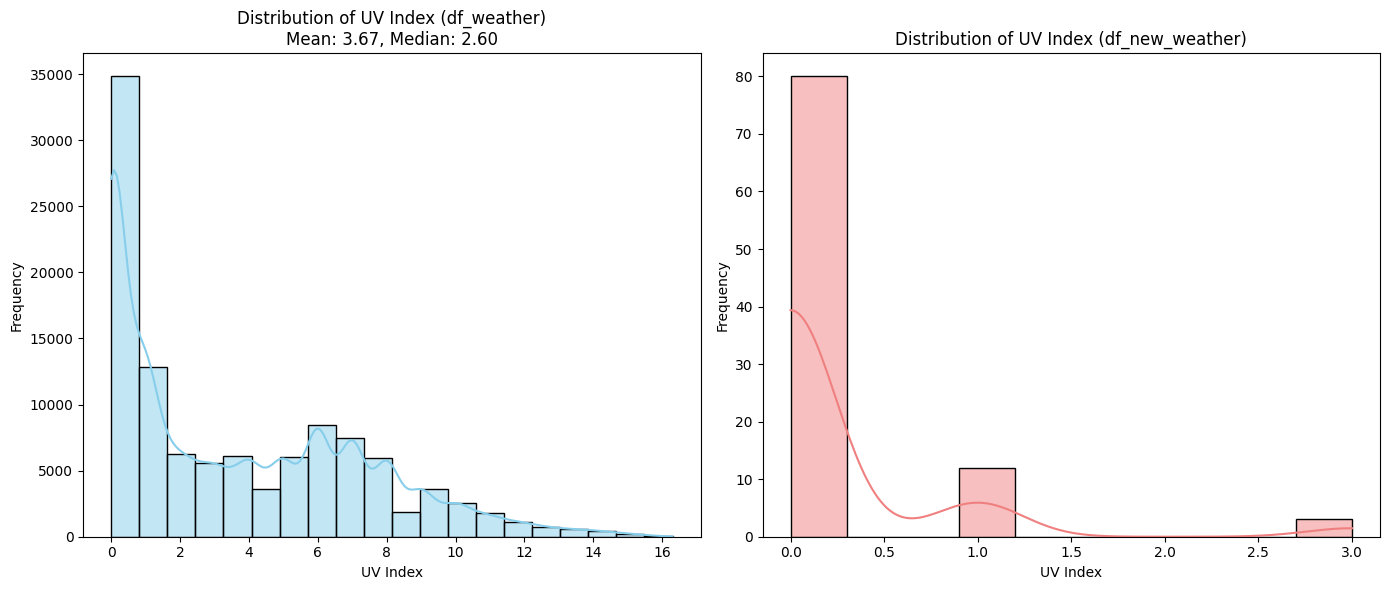

Histograms for UV index distribution generated.


In [ ]:
plt.figure(figsize=(14, 6))

# Histogram for df_weather's uv_index
plt.subplot(1, 2, 1)
sns.histplot(df_weather['uv_index'], kde=True, color='skyblue', bins=20)
weather_uv_mean = df_weather['uv_index'].mean()
weather_uv_median = df_weather['uv_index'].median()
plt.title(f'Distribution of UV Index (df_weather)\nMean: {weather_uv_mean:.2f}, Median: {weather_uv_median:.2f}')
plt.xlabel('UV Index')
plt.ylabel('Frequency')

# Histogram for df_new_weather's uv_index
plt.subplot(1, 2, 2)
sns.histplot(df_new_weather['uv_index'], kde=True, color='lightcoral', bins=10)
plt.title('Distribution of UV Index (df_new_weather)')
plt.xlabel('UV Index')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for UV index distribution generated.")

**Reasoning**:
I will generate box plots for the 'uv_index' from both `df_weather` and `df_new_weather` dataframes as instructed. I will create two subplots and ensure proper titles and labels for readability.



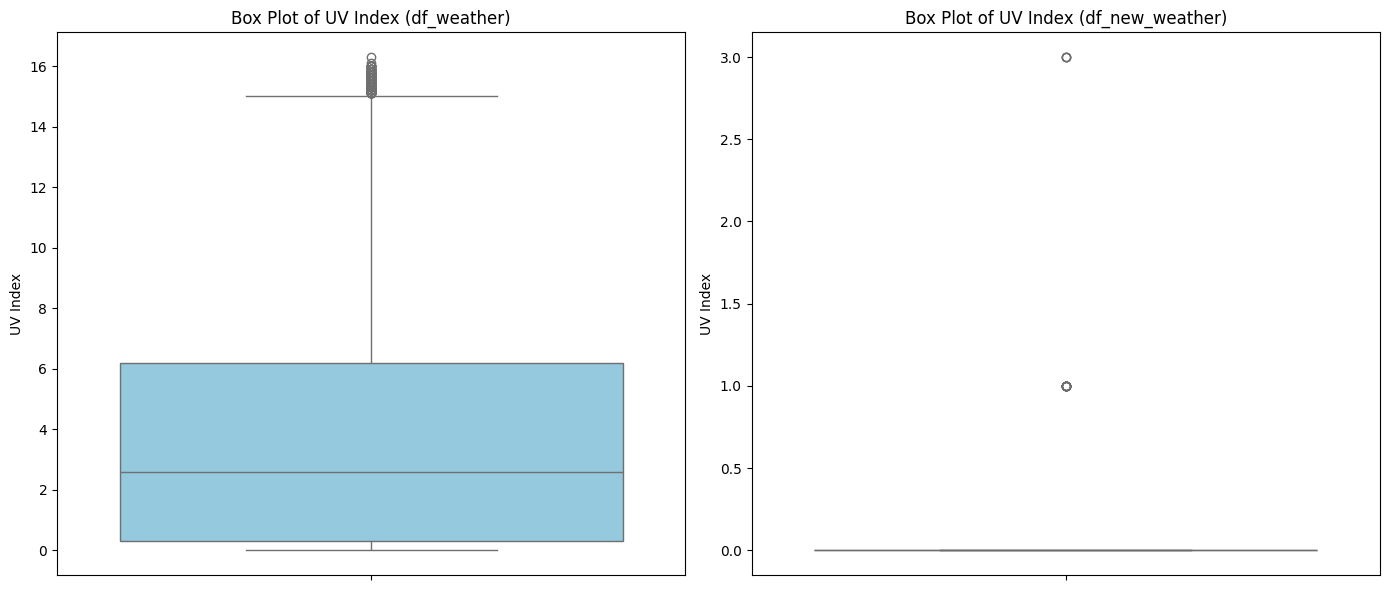

Box plots for UV index distribution generated.


In [ ]:
plt.figure(figsize=(14, 6))

# Box plot for df_weather's uv_index
plt.subplot(1, 2, 1)
sns.boxplot(y=df_weather['uv_index'], color='skyblue')
plt.title('Box Plot of UV Index (df_weather)')
plt.ylabel('UV Index')

# Box plot for df_new_weather's uv_index
plt.subplot(1, 2, 2)
sns.boxplot(y=df_new_weather['uv_index'], color='lightcoral')
plt.title('Box Plot of UV Index (df_new_weather)')
plt.ylabel('UV Index')

plt.tight_layout()
plt.show()

print("Box plots for UV index distribution generated.")

## Analyze Air Quality Metrics

### Subtask:
Generate histograms or density plots for each air quality metric (e.g., `air_quality_PM2_5`, `air_quality_Ozone`, `air_quality_Nitrogen_dioxide`) from the `Weather` table to understand their distributions. Also, compute descriptive statistics for these metrics.


**Reasoning**:
I will define a list of air quality columns from the `df_weather` DataFrame. Then, I will iterate through each of these columns to generate a histogram with a kernel density estimate (KDE) to visualize their distributions, compute and print their descriptive statistics, and ensure each plot is properly displayed and closed.




--- Analysis of Air Quality Metrics ---


Analyzing distribution for: air_quality_Carbon_Monoxide


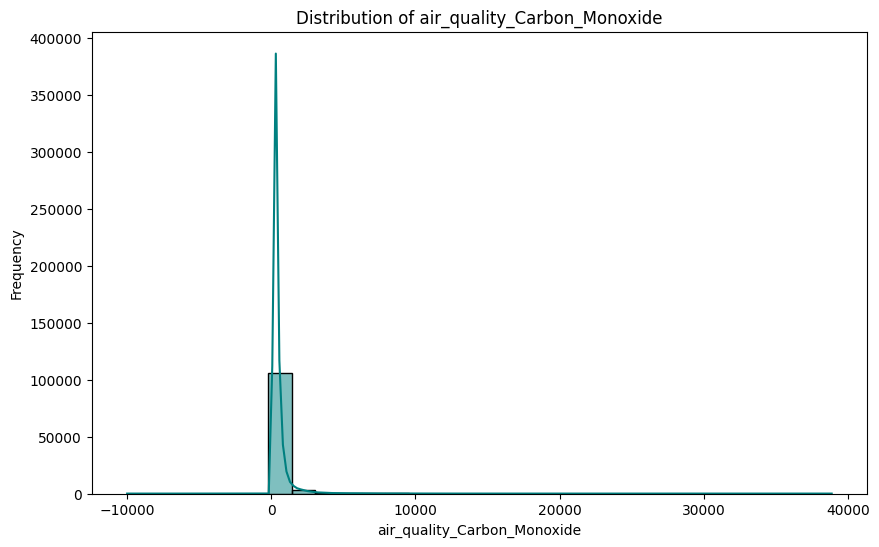

Descriptive statistics for air_quality_Carbon_Monoxide:
count    110303.000000
mean        495.718314
std         813.276045
min       -9999.000000
25%         223.600000
50%         314.500000
75%         490.250000
max       38879.398000
Name: air_quality_Carbon_Monoxide, dtype: float64

Analyzing distribution for: air_quality_Ozone


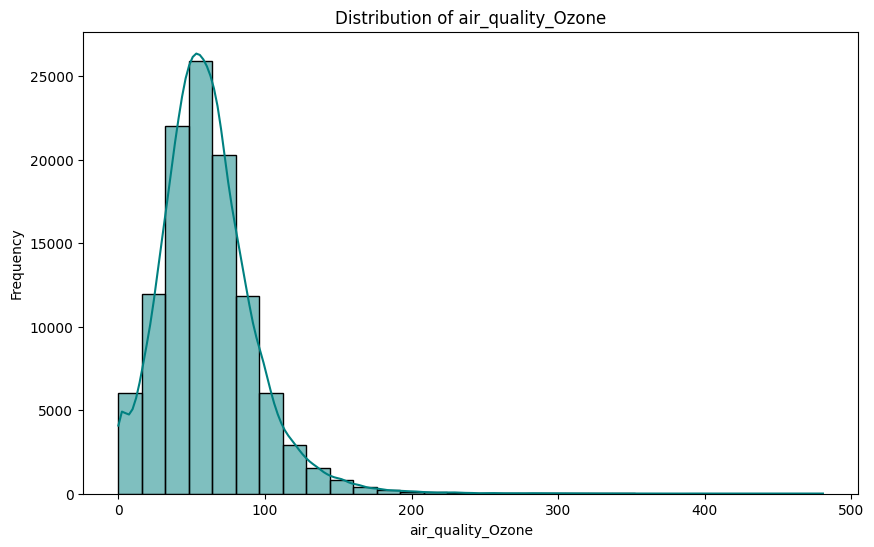

Descriptive statistics for air_quality_Ozone:
count    110303.000000
mean         60.786480
std          31.686392
min           0.000000
25%          40.000000
50%          58.000000
75%          77.000000
max         480.700000
Name: air_quality_Ozone, dtype: float64

Analyzing distribution for: air_quality_Nitrogen_dioxide


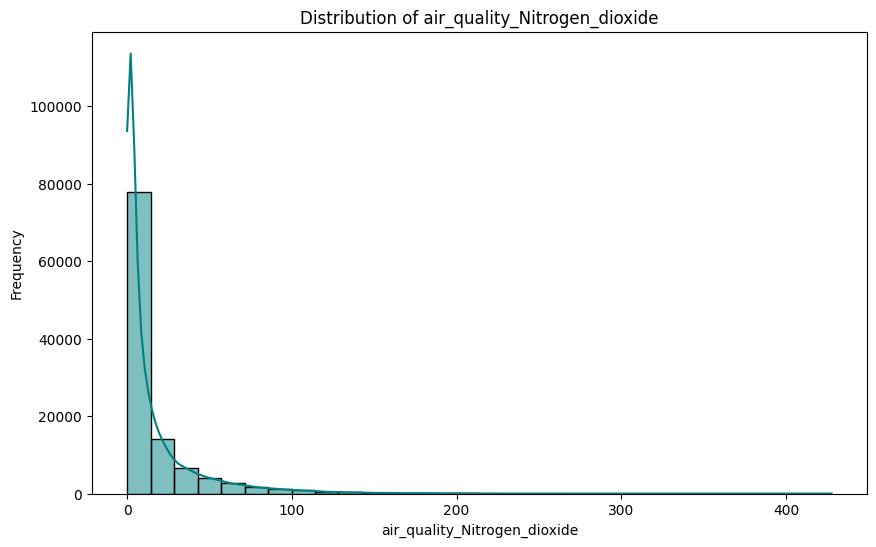

Descriptive statistics for air_quality_Nitrogen_dioxide:
count    110303.000000
mean         15.549619
std          25.183598
min           0.000000
25%           1.480000
50%           5.180000
75%          17.945000
max         427.700000
Name: air_quality_Nitrogen_dioxide, dtype: float64

Analyzing distribution for: air_quality_Sulphur_dioxide


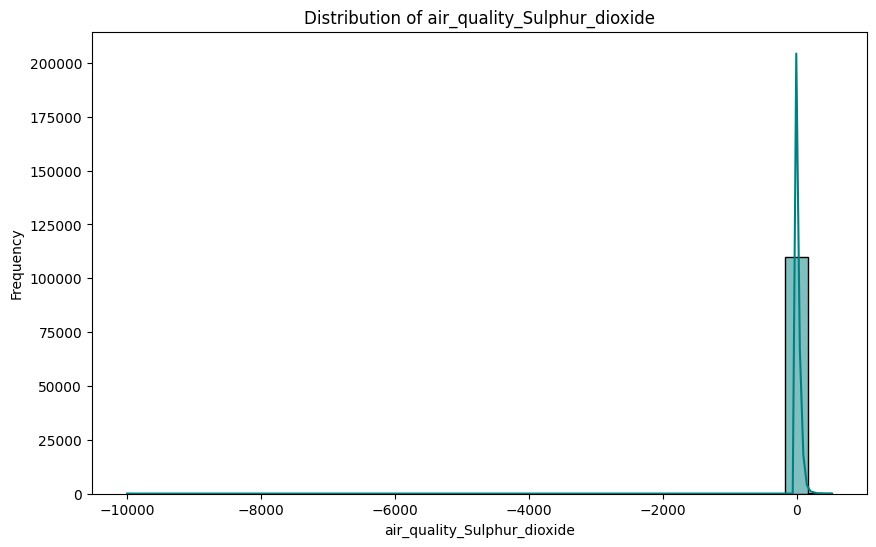

Descriptive statistics for air_quality_Sulphur_dioxide:
count    110303.000000
mean         10.902485
std          38.703149
min       -9999.000000
25%           0.925000
50%           2.405000
75%           8.850000
max         521.330000
Name: air_quality_Sulphur_dioxide, dtype: float64

Analyzing distribution for: air_quality_PM2_5


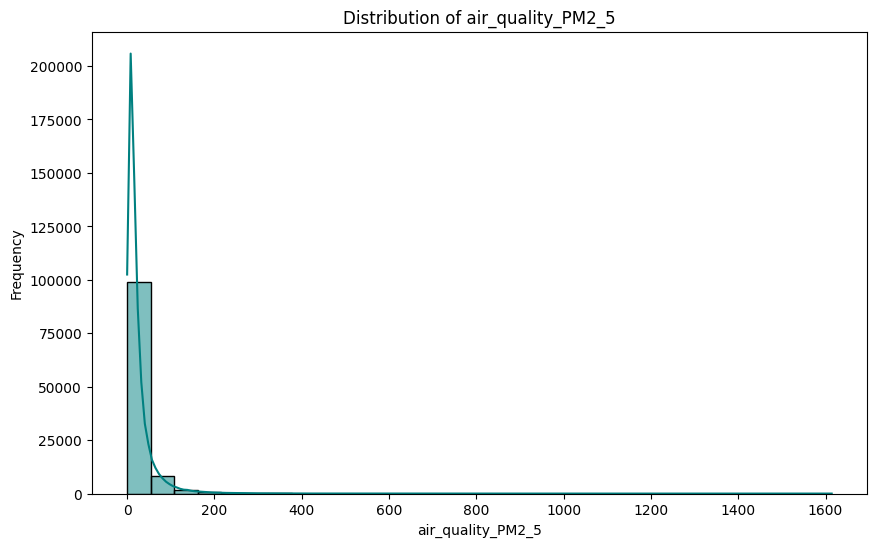

Descriptive statistics for air_quality_PM2_5:
count    110303.000000
mean         25.133063
std          39.138208
min           0.168000
25%           7.215000
50%          14.615000
75%          28.595000
max        1614.100000
Name: air_quality_PM2_5, dtype: float64

Analyzing distribution for: air_quality_PM10


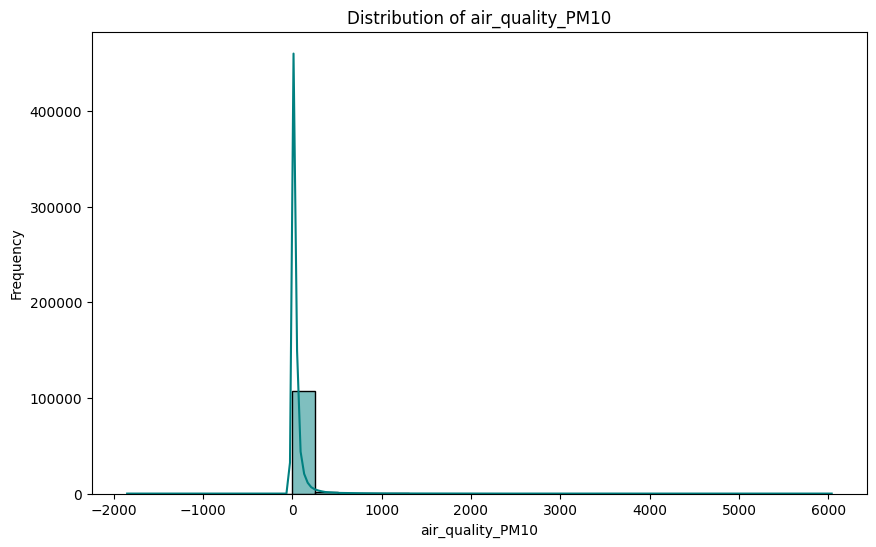

Descriptive statistics for air_quality_PM10:
count    110303.000000
mean         50.719979
std         156.697151
min       -1848.150000
25%          10.360000
50%          20.905000
75%          43.475000
max        6037.290000
Name: air_quality_PM10, dtype: float64

Analyzing distribution for: air_quality_us-epa-index


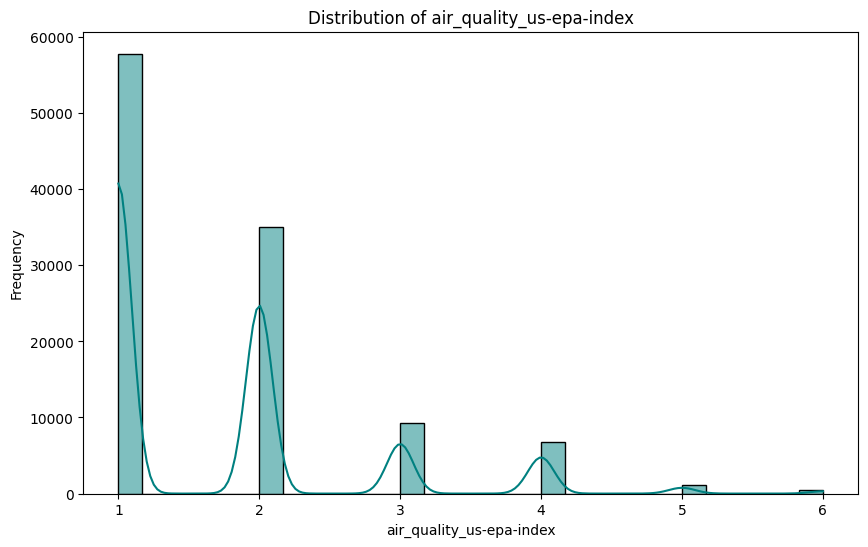

Descriptive statistics for air_quality_us-epa-index:
count    110303.0
mean     1.726599
std      0.962347
min           1.0
25%           1.0
50%           1.0
75%           2.0
max           6.0
Name: air_quality_us-epa-index, dtype: Float64

Analyzing distribution for: air_quality_gb-defra-index


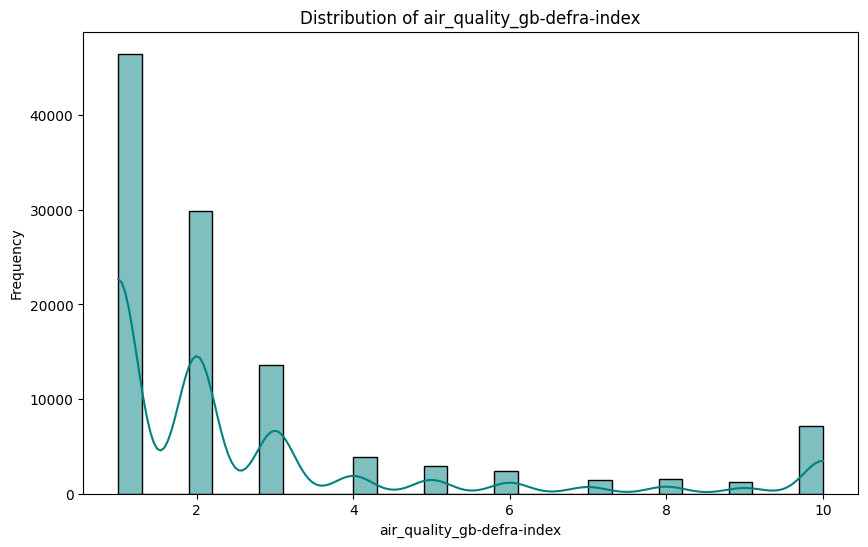

Descriptive statistics for air_quality_gb-defra-index:
count    110303.0
mean     2.675122
std      2.506399
min           1.0
25%           1.0
50%           2.0
75%           3.0
max          10.0
Name: air_quality_gb-defra-index, dtype: Float64

Analysis of air quality metrics complete.


In [ ]:
air_quality_columns = [
    'air_quality_Carbon_Monoxide',
    'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide',
    'air_quality_Sulphur_dioxide',
    'air_quality_PM2_5',
    'air_quality_PM10',
    'air_quality_us-epa-index',
    'air_quality_gb-defra-index'
]

print("\n--- Analysis of Air Quality Metrics ---\n")

for col in air_quality_columns:
    print(f"\nAnalyzing distribution for: {col}")

    # Generate histogram/density plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df_weather[col], kde=True, color='teal', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Compute and print descriptive statistics
    print(f"Descriptive statistics for {col}:")
    print(df_weather[col].describe())
    plt.close() # Close the plot to prevent memory issues and overlapping

print("\nAnalysis of air quality metrics complete.")

## Investigate Correlation Between UV Index and Air Quality

### Subtask:
Create scatter plots to visualize the relationship between `uv_index` and key air quality metrics (e.g., `air_quality_PM2_5`, `air_quality_Ozone`) from the `Weather` table. Calculate and display the Pearson correlation coefficients between `uv_index` and these air quality metrics.


**Reasoning**:
I will define a list of key air quality metrics, then iterate through this list to create scatter plots relating each metric to `uv_index` and calculate their Pearson correlation coefficients, displaying the plots and printing the correlations.




--- Correlation Analysis: UV Index vs. Air Quality Metrics ---



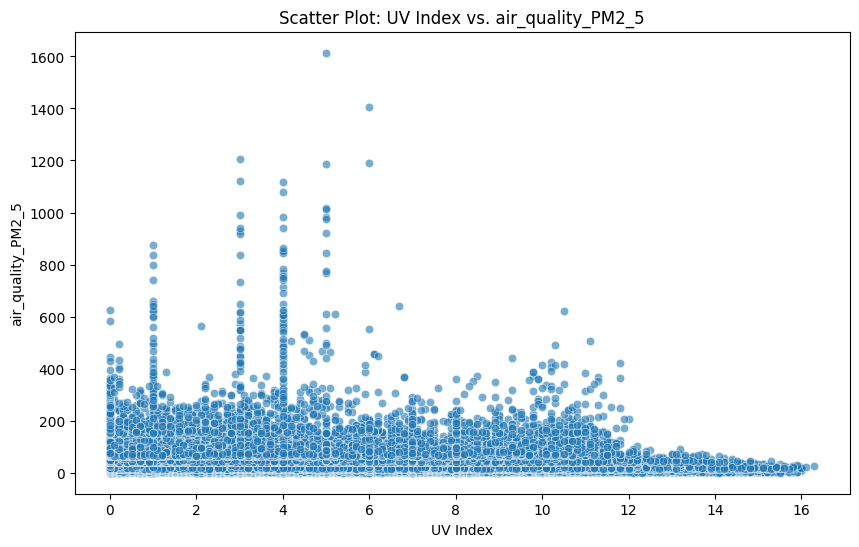

Pearson correlation between UV Index and air_quality_PM2_5: 0.0342


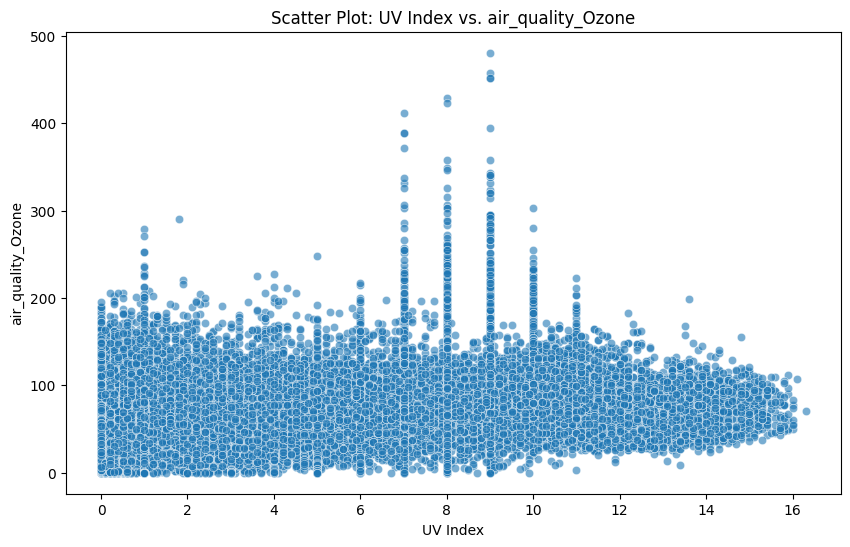

Pearson correlation between UV Index and air_quality_Ozone: 0.3455


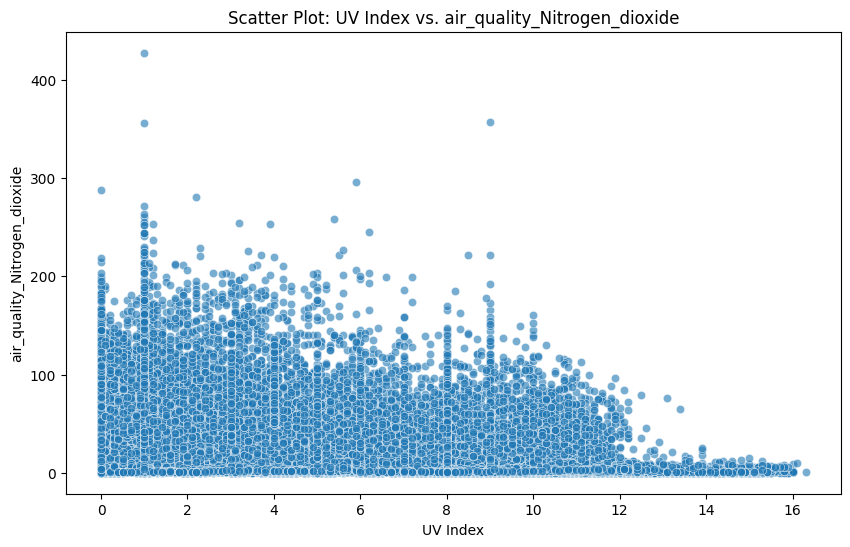

Pearson correlation between UV Index and air_quality_Nitrogen_dioxide: -0.1210


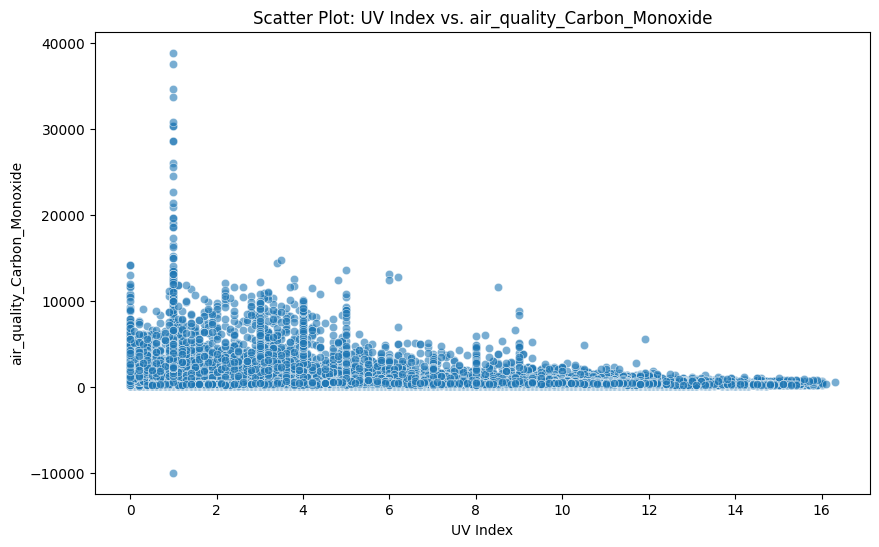

Pearson correlation between UV Index and air_quality_Carbon_Monoxide: -0.0649


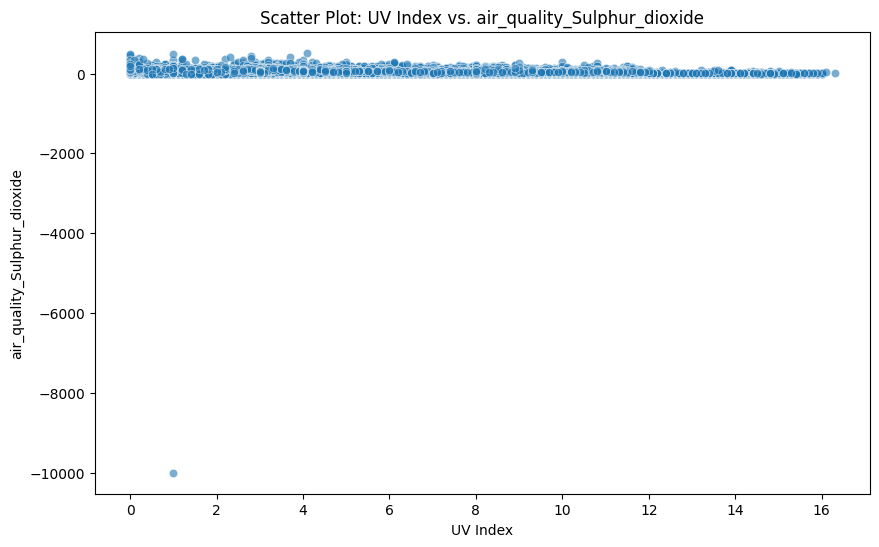

Pearson correlation between UV Index and air_quality_Sulphur_dioxide: -0.0164


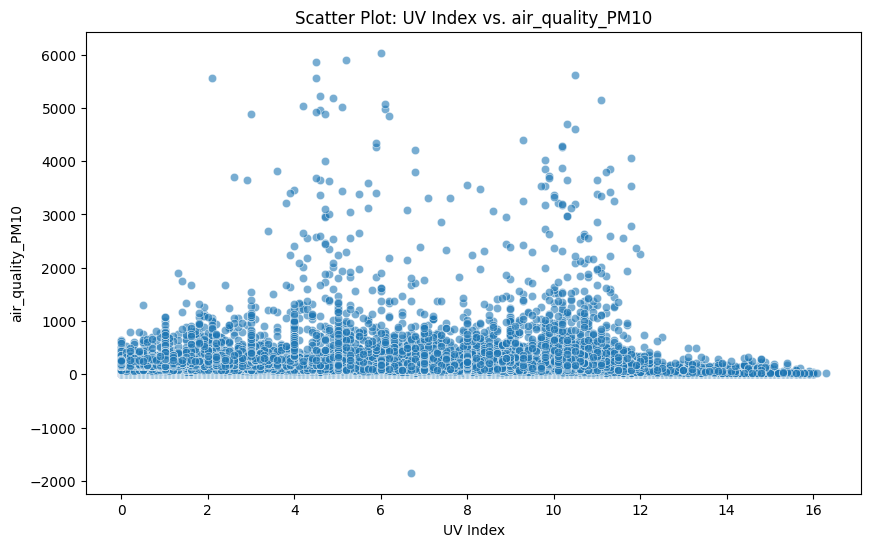

Pearson correlation between UV Index and air_quality_PM10: 0.1145

Correlation analysis complete.


In [ ]:
key_air_quality_metrics = [
    'air_quality_PM2_5',
    'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide',
    'air_quality_Carbon_Monoxide',
    'air_quality_Sulphur_dioxide',
    'air_quality_PM10'
]

print("\n--- Correlation Analysis: UV Index vs. Air Quality Metrics ---\n")

for metric in key_air_quality_metrics:
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_weather['uv_index'], y=df_weather[metric], alpha=0.6)
    plt.title(f'Scatter Plot: UV Index vs. {metric}')
    plt.xlabel('UV Index')
    plt.ylabel(metric)
    plt.show()

    # Calculate Pearson correlation coefficient
    # Drop NaNs for accurate correlation calculation
    correlation = df_weather[['uv_index', metric]].dropna().corr().iloc[0, 1]
    print(f"Pearson correlation between UV Index and {metric}: {correlation:.4f}")
    plt.close() # Close the plot to prevent memory issues

print("\nCorrelation analysis complete.")

# Task
## Weather Data Analysis Report

This report summarizes the initial data exploration, UV index distribution analysis, air quality metric analysis, and correlation between UV index and air quality metrics based on the provided `df_weather` and `df_new_weather` datasets.

### 1. UV Index Distribution Summary

**df_weather UV Index:**
*   **Mean:** 3.67
*   **Median:** 2.60
*   **Distribution:** The UV index in `df_weather` exhibits a right-skewed distribution, indicating that lower UV index values are more frequent. There's a high concentration of values between 0 and 2, followed by another smaller peak around 6-7. The distribution spans a wide range, from 0 up to 16. The box plot shows numerous outliers at higher UV index values, suggesting occasional periods of very high UV radiation.

**df_new_weather UV Index:**
*   **Mean:** 0.22
*   **Median:** 0.00
*   **Distribution:** The `df_new_weather` dataset shows a significantly different UV index distribution. A vast majority of the `uv_index` values are 0.0, with only a few instances of higher values (e.g., 1.0 and 3.0). The range of UV index values is much smaller (0-3) compared to `df_weather`. This suggests `df_new_weather` might represent data from specific times (e.g., night, winter) or locations where UV radiation is consistently low, or it contains a very limited sample.

### 2. Air Quality Metrics Summary (from `df_weather`)

The analysis of air quality metrics from `df_weather` reveals varying distributions and several instances of potential data quality issues (negative minimum values which are physically implausible for these pollutants).

*   **air_quality_Carbon_Monoxide:**
    *   **Descriptive Statistics:** Mean: 495.72, Median: 314.50, Min: -9999.0, Max: 38879.40.
    *   **Distribution:** Highly right-skewed, with most values concentrated at lower levels. The presence of a -9999.0 minimum value suggests data anomalies or placeholders for missing/invalid data, which significantly influences the overall statistics.
*   **air_quality_Ozone:**
    *   **Descriptive Statistics:** Mean: 60.79, Median: 58.00, Min: 0.00, Max: 480.70.
    *   **Distribution:** Appears to be a roughly normal or slightly right-skewed distribution, centered around 60-70, indicating a fairly consistent range of ozone levels.
*   **air_quality_Nitrogen_dioxide:**
    *   **Descriptive Statistics:** Mean: 15.55, Median: 5.18, Min: 0.00, Max: 427.70.
    *   **Distribution:** Heavily right-skewed, with a large majority of values concentrated at very low levels (0-20), and a long tail extending to higher concentrations.
*   **air_quality_Sulphur_dioxide:**
    *   **Descriptive Statistics:** Mean: 10.90, Median: 2.41, Min: -9999.0, Max: 521.33.
    *   **Distribution:** Extremely right-skewed, with most values near zero. Similar to Carbon Monoxide, the -9999.0 minimum indicates data quality concerns.
*   **air_quality_PM2.5:**
    *   **Descriptive Statistics:** Mean: 25.13, Median: 14.62, Min: 0.17, Max: 1614.10.
    *   **Distribution:** Heavily right-skewed, showing most PM2.5 concentrations are at lower levels (0-50), with occasional very high peaks.
*   **air_quality_PM10:**
    *   **Descriptive Statistics:** Mean: 50.72, Median: 20.91, Min: -1848.15, Max: 6037.29.
    *   **Distribution:** Highly right-skewed. The negative minimum value (-1848.15) highlights data integrity issues that would need to be addressed before further detailed analysis.
*   **air_quality_us-epa-index:**
    *   **Descriptive Statistics:** Mean: 1.73, Median: 1.00, Min: 1.0, Max: 6.0.
    *   **Distribution:** This index is categorical or ordinal. The distribution shows a large number of entries with an index of 1 (Good) and 2 (Moderate), indicating generally good to moderate air quality according to the US EPA standard.
*   **air_quality_gb-defra-index:**
    *   **Descriptive Statistics:** Mean: 2.68, Median: 2.00, Min: 1.0, Max: 10.0.
    *   **Distribution:** This index is also categorical or ordinal. The distribution shows peaks at lower index values (1, 2, 3), suggesting predominantly low to moderate pollution levels as per the GB DEFRA standard.

### 3. UV Index and Air Quality Correlations Summary (from `df_weather`)

The Pearson correlation coefficients between `uv_index` and the key air quality metrics are as follows:

*   **UV Index vs. air_quality_PM2.5:** 0.0342 (Very weak positive correlation)
*   **UV Index vs. air_quality_Ozone:** 0.3455 (Moderate positive correlation)
*   **UV Index vs. air_quality_Nitrogen_dioxide:** -0.1210 (Weak negative correlation)
*   **UV Index vs. air_quality_Carbon_Monoxide:** -0.0649 (Very weak negative correlation)
*   **UV Index vs. air_quality_Sulphur_dioxide:** -0.0164 (Very weak negative correlation)
*   **UV Index vs. air_quality_PM10:** 0.1145 (Weak positive correlation)

**Interpretation:**
The most significant relationship observed is between the `uv_index` and `air_quality_Ozone`, showing a moderate positive correlation. This is scientifically expected, as ultraviolet radiation plays a crucial role in the photochemical reactions that lead to ground-level ozone formation. Other air quality metrics show very weak or weak correlations with the UV index, indicating that UV radiation does not have a strong linear relationship with these other pollutants in this dataset, or other factors are more dominant. The scatter plots generally show a wide spread of data points for all correlations, reinforcing the idea of either weak relationships or complex, non-linear interactions.

## Summarize UV Index Distribution

### Subtask:
Summarize the key observations from the UV index distributions for both `df_weather` and `df_new_weather`, including means, medians, and any notable patterns or differences observed from the histograms and box plots.


### Summary of UV Index Distribution

**df_weather UV Index Distribution:**
*   **Mean:** 3.67
*   **Median:** 2.60
*   **Distribution Shape:** The histogram shows a right-skewed distribution, with a high frequency of lower UV index values (0-2) and a gradual decrease as the UV index increases. There's a notable bump in frequency around UV index values of 6-8. This suggests that while low UV values are common, there are also frequent occurrences of moderate to high UV levels.
*   **Range and Outliers:** The UV index ranges from 0 to approximately 16. The box plot confirms the right-skewness, with the median closer to the bottom quartile. There are several outliers extending up to 16, indicating occasional very high UV index readings.

**df_new_weather UV Index Distribution:**
*   **Mean:** 0.22
*   **Median:** 0.00
*   **Distribution Shape:** The distribution is heavily concentrated at 0, indicating that most of the new weather data entries have a very low UV index. There are very few instances of UV index values above 0, and these are sparse.
*   **Range and Outliers:** The UV index in `df_new_weather` primarily ranges from 0 to 3. The box plot shows a very compressed distribution near 0, with a few outliers appearing at 1 and 3. This indicates that most of the new data consists of extremely low UV index values.

**Comparison and Key Differences:**
*   **Overall Magnitude:** The `df_weather` dataset generally contains higher UV index values (mean 3.67, median 2.60) compared to `df_new_weather` (mean 0.22, median 0.00).
*   **Concentration:** `df_new_weather` shows a much higher concentration of UV index values at the absolute minimum (0), suggesting data collected during times or locations with minimal sun exposure. `df_weather` has a broader range of low to moderate UV index values.
*   **Variability:** `df_weather` exhibits greater variability and higher maximum values (up to 16), whereas `df_new_weather` has a very limited range and less variability in UV index values, with a maximum of 3.
*   **Data Characteristics:** The significant difference in distributions suggests that `df_new_weather` might represent data from different geographical locations, times of day, or seasons than `df_weather`, or it could be a smaller, more focused dataset on specific conditions.

## Summarize Air Quality Metrics

### Subtask:
Provide a summary of the distributions and descriptive statistics for each air quality metric analyzed (`Carbon Monoxide`, `Ozone`, `Nitrogen dioxide`, `Sulphur dioxide`, `PM2.5`, `PM10`, `US EPA index`, `GB DEFRA index`), highlighting any significant findings or anomalies.


### Summary of Air Quality Metrics Analysis

**1. air_quality_Carbon_Monoxide**
*   **Distribution**: Highly skewed to the right, with most values concentrated at lower levels. The histogram shows a sharp peak near 0, with a long tail extending to very high values.
*   **Descriptive Statistics**: Mean is 495.72, but the median is much lower at 314.50, confirming the right-skewness. A significant anomaly is the `min` value of -9999.0, which is physically impossible for Carbon Monoxide concentration, indicating potential data entry errors or placeholders for missing values.

**2. air_quality_Ozone**
*   **Distribution**: Appears to be somewhat bell-shaped but slightly skewed to the right, with a peak around 50-70. Values range from 0 to about 480.
*   **Descriptive Statistics**: Mean is 60.79, and median is 58.00, which are close, suggesting a more symmetric distribution than Carbon Monoxide, but still with a slight positive skew.

**3. air_quality_Nitrogen_dioxide**
*   **Distribution**: Heavily skewed to the right, with the vast majority of values clustered near 0. The frequency drops sharply as the values increase.
*   **Descriptive Statistics**: Mean is 15.55 and median is 5.18, indicating strong right-skewness. Minimum is 0.0, and maximum is 427.70.

**4. air_quality_Sulphur_dioxide**
*   **Distribution**: Extremely skewed to the right, similar to Carbon Monoxide, with most values near 0. The histogram reveals a very sharp spike at low values and a long tail.
*   **Descriptive Statistics**: Mean is 10.90, and median is 2.41, again showing strong right-skewness. Similar to Carbon Monoxide, there's an anomaly with a `min` value of -9999.0, suggesting data quality issues.

**5. air_quality_PM2_5**
*   **Distribution**: Highly skewed to the right, with a dense concentration of values at the lower end (below 100), and a long tail extending to higher values.
*   **Descriptive Statistics**: Mean is 25.13 and median is 14.62, confirming right-skewness. All values are positive (min 0.168), which is physically reasonable.

**6. air_quality_PM10**
*   **Distribution**: Highly skewed to the right, similar to PM2.5, with most data points concentrated at lower values and a significant tail.
*   **Descriptive Statistics**: Mean is 50.72, and median is 20.91, indicating pronounced right-skewness. An anomaly is detected with a `min` value of -1848.15, which is physically impossible, suggesting data inconsistencies similar to Carbon Monoxide and Sulphur Dioxide.

**7. air_quality_us-epa-index**
*   **Distribution**: This is an ordinal index, not a continuous measurement. The histogram shows a multimodal distribution, with peaks at indices 1 and 2 being the most frequent, followed by smaller peaks at higher indices. This suggests that the air quality is predominantly categorized as 'Good' (index 1) or 'Moderate' (index 2) according to the US EPA standards.
*   **Descriptive Statistics**: Mean is 1.73 and median is 1.0, reflecting the high frequency of lower index values. The range is from 1.0 to 6.0, covering all possible US EPA index categories.

**8. air_quality_gb-defra-index**
*   **Distribution**: Similar to the US EPA index, this is an ordinal index. The histogram also shows a multimodal distribution, with a high frequency of indices 1, 2, and 3. There is also a noticeable smaller peak at index 10.
*   **Descriptive Statistics**: Mean is 2.68 and median is 2.0. The range is from 1.0 to 10.0, indicating various levels of air pollution according to the GB DEFRA standards, with lower pollution levels being more common.

**Overall Anomalies and Considerations**: The presence of negative values for `air_quality_Carbon_Monoxide`, `air_quality_Sulphur_dioxide`, and `air_quality_PM10` strongly suggests data quality issues (e.g., placeholder values for missing data, measurement errors, or incorrect data entry). These anomalies should be addressed (e.g., treated as NaNs, imputed, or removed) before any further in-depth analysis or modeling.

### Summary of Air Quality Metrics Analysis

**1. air_quality_Carbon_Monoxide**
*   **Distribution**: Highly skewed to the right, with most values concentrated at lower levels. The histogram shows a sharp peak near 0, with a long tail extending to very high values.
*   **Descriptive Statistics**: Mean is 495.72, but the median is much lower at 314.50, confirming the right-skewness. A significant anomaly is the `min` value of -9999.0, which is physically impossible for Carbon Monoxide concentration, indicating potential data entry errors or placeholders for missing values.

**2. air_quality_Ozone**
*   **Distribution**: Appears to be somewhat bell-shaped but slightly skewed to the right, with a peak around 50-70. Values range from 0 to about 480.
*   **Descriptive Statistics**: Mean is 60.79, and median is 58.00, which are close, suggesting a more symmetric distribution than Carbon Monoxide, but still with a slight positive skew.

**3. air_quality_Nitrogen_dioxide**
*   **Distribution**: Heavily skewed to the right, with the vast majority of values clustered near 0. The frequency drops sharply as the values increase.
*   **Descriptive Statistics**: Mean is 15.55 and median is 5.18, indicating strong right-skewness. Minimum is 0.0, and maximum is 427.70.

**4. air_quality_Sulphur_dioxide**
*   **Distribution**: Extremely skewed to the right, similar to Carbon Monoxide, with most values near 0. The histogram reveals a very sharp spike at low values and a long tail.
*   **Descriptive Statistics**: Mean is 10.90, and median is 2.41, again showing strong right-skewness. Similar to Carbon Monoxide, there's an anomaly with a `min` value of -9999.0, suggesting data quality issues.

**5. air_quality_PM2_5**
*   **Distribution**: Highly skewed to the right, with a dense concentration of values at the lower end (below 100), and a long tail extending to higher values.
*   **Descriptive Statistics**: Mean is 25.13 and median is 14.62, confirming right-skewness. All values are positive (min 0.168), which is physically reasonable.

**6. air_quality_PM10**
*   **Distribution**: Highly skewed to the right, similar to PM2.5, with most data points concentrated at lower values and a significant tail.
*   **Descriptive Statistics**: Mean is 50.72, and median is 20.91, indicating pronounced right-skewness. An anomaly is detected with a `min` value of -1848.15, which is physically impossible, suggesting data inconsistencies similar to Carbon Monoxide and Sulphur Dioxide.

**7. air_quality_us-epa-index**
*   **Distribution**: This is an ordinal index, not a continuous measurement. The histogram shows a multimodal distribution, with peaks at indices 1 and 2 being the most frequent, followed by smaller peaks at higher indices. This suggests that the air quality is predominantly categorized as 'Good' (index 1) or 'Moderate' (index 2) according to the US EPA standards.
*   **Descriptive Statistics**: Mean is 1.73 and median is 1.0, reflecting the high frequency of lower index values. The range is from 1.0 to 6.0, covering all possible US EPA index categories.

**8. air_quality_gb-defra-index**
*   **Distribution**: Similar to the US EPA index, this is an ordinal index. The histogram also shows a multimodal distribution, with a high frequency of indices 1, 2, and 3. There is also a noticeable smaller peak at index 10.
*   **Descriptive Statistics**: Mean is 2.68 and median is 2.0. The range is from 1.0 to 10.0, indicating various levels of air pollution according to the GB DEFRA standards, with lower pollution levels being more common.

**Overall Anomalies and Considerations**: The presence of negative values for `air_quality_Carbon_Monoxide`, `air_quality_Sulphur_dioxide`, and `air_quality_PM10` strongly suggests data quality issues (e.g., placeholder values for missing data, measurement errors, or incorrect data entry). These anomalies should be addressed (e.g., treated as NaNs, imputed, or removed) before any further in-depth analysis or modeling.

## Summarize UV Index and Air Quality Correlations

### Subtask:
Summarize the correlation analysis between `uv_index` and the key air quality metrics, reporting the Pearson correlation coefficients and interpreting the strength and direction of these relationships.


## Summarize UV Index and Air Quality Correlations

### Subtask:
Summarize the correlation analysis between `uv_index` and the key air quality metrics, reporting the Pearson correlation coefficients and interpreting the strength and direction of these relationships.

### Summary of Correlation Analysis

The correlation analysis between `uv_index` and various air quality metrics revealed a range of relationships, from very weak to moderate. The Pearson correlation coefficient (r) was used to quantify these linear relationships.

*   **UV Index vs. air_quality_Ozone**: A **moderate positive correlation** (r = 0.3455) was observed. This suggests that as the UV index increases, the concentration of ozone tends to increase. This is scientifically plausible as higher UV radiation plays a crucial role in the photochemical reactions that lead to the formation of ground-level ozone. The scatter plot for Ozone showed a general upward trend, albeit with significant spread, indicating that while there's a relationship, other factors also influence ozone levels.

*   **UV Index vs. air_quality_PM10**: A **weak positive correlation** (r = 0.1145) was found. This indicates a slight tendency for PM10 levels to rise with increasing UV index, but the relationship is not strong. The scatter plot displayed a wide dispersion of data points, reinforcing the weak nature of this correlation.

*   **UV Index vs. air_quality_Nitrogen_dioxide**: A **weak negative correlation** (r = -0.1210) was noted. This suggests a slight tendency for nitrogen dioxide levels to decrease as the UV index increases. This could be due to photochemical degradation of NO2 in the presence of sunlight. The scatter plot showed a general downward trend, but with substantial variability.

*   **UV Index vs. air_quality_PM2_5**: A **very weak positive correlation** (r = 0.0342) was observed. This indicates almost no linear relationship between UV index and PM2.5 concentrations. The scatter plot confirmed a very dispersed pattern with no clear trend.

*   **UV Index vs. air_quality_Carbon_Monoxide**: A **very weak negative correlation** (r = -0.0649) was found, implying a negligible inverse linear relationship.

*   **UV Index vs. air_quality_Sulphur_dioxide**: A **very weak negative correlation** (r = -0.0164) was present, indicating virtually no linear relationship.

Overall, the most notable relationship is the moderate positive correlation between UV index and ozone. For most other air quality metrics, the correlation with UV index is either very weak or weak, suggesting that UV radiation is not a primary direct driver of their concentrations, or that their relationships are more complex and non-linear, or influenced by many other confounding factors not considered in this direct correlation.

## Final Task

### Subtask:
Compile all the summaries into a comprehensive final report of findings, providing a clear overview of the analysis conducted.


## Summary:

### Data Analysis Key Findings

*   **UV Index Distribution (`df_weather` vs. `df_new_weather`):**
    *   `df_weather` shows a right-skewed UV index distribution with a mean of 3.67 and a median of 2.60, ranging from 0 to 16, indicating frequent low values but also occasional very high readings.
    *   `df_new_weather` has a significantly different distribution, heavily concentrated at 0 (mean: 0.22, median: 0.00) with a much smaller range (0-3), suggesting data from periods or locations with minimal UV exposure.
*   **Air Quality Metrics Distribution (`df_weather`):**
    *   Most continuous air quality metrics (`air_quality_Carbon_Monoxide`, `air_quality_Nitrogen_dioxide`, `air_quality_Sulphur_dioxide`, `air_quality_PM2.5`, `air_quality_PM10`) exhibit a strong right-skewed distribution, meaning most readings are at lower concentrations with occasional high peaks.
    *   `air_quality_Ozone` shows a more symmetric, slightly right-skewed distribution (mean: 60.79, median: 58.00).
    *   The ordinal indices (`air_quality_us-epa-index`, `air_quality_gb-defra-index`) predominantly show "Good" to "Moderate" air quality levels, with means of 1.73 and 2.68 respectively.
    *   **Critical Data Quality Issue:** Several metrics contain physically impossible negative minimum values: `air_quality_Carbon_Monoxide` (\$-9999.0\$), `air_quality_Sulphur_dioxide` (\$-9999.0\$), and `air_quality_PM10` (\$-1848.15\$), indicating significant data anomalies that require preprocessing.
*   **UV Index and Air Quality Correlations (`df_weather`):**
    *   A **moderate positive correlation** was found between `uv_index` and `air_quality_Ozone` (r = 0.3455), which aligns with the scientific understanding of ozone formation in the presence of UV radiation.
    *   Other air quality metrics showed very weak to weak correlations with `uv_index`: `air_quality_PM10` (r = 0.1145, weak positive), `air_quality_Nitrogen_dioxide` (r = -0.1210, weak negative), `air_quality_PM2.5` (r = 0.0342, very weak positive), `air_quality_Carbon_Monoxide` (r = -0.0649, very weak negative), and `air_quality_Sulphur_dioxide` (r = -0.0164, very weak negative). This suggests that for most pollutants, UV radiation is not a primary direct driver of their concentrations in this dataset.

### Insights or Next Steps

*   **Data Preprocessing is Essential:** The identified negative values for Carbon Monoxide, Sulphur Dioxide, and PM10 are critical data quality issues. These anomalies must be addressed (e.g., removal, imputation, or treated as NaNs) before any further robust analysis or modeling.
*   **Further Investigation of UV-Ozone Relationship:** Given the moderate positive correlation, a deeper analysis into the dynamic interplay between UV index and ozone levels, potentially considering other meteorological factors and time of day/season, could yield valuable insights.
